In [161]:
#this eda is important for preparing date and time columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [162]:
df = pd.read_excel("flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [163]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5948,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,11:40,19:00,7h 20m,1 stop,No info,11789
5359,Jet Airways,12/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 13 Jun,22h,2 stops,In-flight meal not included,10919
4460,IndiGo,3/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,08:35,21:20,12h 45m,2 stops,No info,8049
9261,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
9681,Air India,24/05/2019,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,08:55 25 May,23h 5m,2 stops,No info,15170


In [164]:
df.shape

(10683, 11)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [166]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [167]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route has null values
As per our understanding a flight can not go from one place to another without taking route
So lets the drop the null value


In [168]:
df.dropna(axis = 0, inplace = True)

In [169]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [170]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [171]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [172]:
"Suraj/Gupta".split("/")[0]

'Suraj'

In [173]:
df["day"] = df["Date_of_Journey"].str.split('/').str[0]
df["month"] = df["Date_of_Journey"].str.split('/').str[1]
df["year"] = df["Date_of_Journey"].str.split('/').str[2]

In [174]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [175]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                object
month              object
year               object
dtype: object

In [176]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [177]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
dtype: object

In [178]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  int64 
 11  month            10682 non-null  int64 
 12  year             10682 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [180]:
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], shape=(1343,), dtype=object)

In [181]:
df.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [182]:
df['Arrival_Time'].apply(lambda x:x.split(' '))
#You want only the time, that is 0th element

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10682, dtype: object

In [184]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [186]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [187]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_mins'] = df['Arrival_Time'].str.split(':').str[1]

In [188]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  day              10682 non-null  int64 
 11  month            10682 non-null  int64 
 12  year             10682 non-null  int64 
 13  Arrival_hour     10682 non-null  object
 14  Arrival_mins     10682 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [190]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_mins'] = df['Arrival_mins'].astype(int)

In [191]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hour        int64
Arrival_mins        int64
dtype: object

In [192]:
df.drop('Arrival_Time', axis = 1, inplace = True)

In [193]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hour        int64
Arrival_mins        int64
dtype: object

In [194]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'day', 'month', 'year',
       'Arrival_hour', 'Arrival_mins'],
      dtype='object')

In [195]:
df.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [196]:
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_mins'] = df['Dep_Time'].str.split(':').str[1]

In [197]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [198]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'day', 'month', 'year',
       'Arrival_hour', 'Arrival_mins', 'Dept_hour', 'Dept_mins'],
      dtype='object')

In [199]:
df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_mins'] = df['Dept_mins'].astype(int)

In [200]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [201]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'year', 'Arrival_hour',
       'Arrival_mins', 'Dept_hour', 'Dept_mins'],
      dtype='object')

In [202]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'year', 'Arrival_hour',
       'Arrival_mins', 'Dept_hour', 'Dept_mins'],
      dtype='object')

In [203]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int64
month               int64
year                int64
Arrival_hour        int64
Arrival_mins        int64
Dept_hour           int64
Dept_mins           int64
dtype: object

In [204]:
df.Total_Stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [205]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [206]:
df['Total_Stops'].isna().sum()

np.int64(0)

In [207]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins


In [208]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [209]:
df['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [210]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [211]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [212]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   day              10682 non-null  int64 
 9   month            10682 non-null  int64 
 10  year             10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_mins     10682 non-null  int64 
 13  Dept_hour        10682 non-null  int64 
 14  Dept_mins        10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [214]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,2019,14,10,11,30


In [215]:
#Route can be used in two ways
#To know source and destination>> which is already in the data
#as number of stops>> total stops is already there
#So route is a repeatative information so we can drop it if we want

In [216]:
# df.drop('Route', axis = 1, inplace = True)

In [217]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [219]:
df['duration_hours'] = df.Duration.str.split(' ').str[0].str.split('h').str[0]

In [220]:
df['duration_minutes'] = df.Duration.str.split(' ').str[1].str.split('m').str[0]

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  object
 5   Total_Stops       10682 non-null  int64 
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   day               10682 non-null  int64 
 9   month             10682 non-null  int64 
 10  year              10682 non-null  int64 
 11  Arrival_hour      10682 non-null  int64 
 12  Arrival_mins      10682 non-null  int64 
 13  Dept_hour         10682 non-null  int64 
 14  Dept_mins         10682 non-null  int64 
 15  duration_hours    10682 non-null  object
 16  duration_minutes  9650 non-null   object
dtypes: int64(9), obje

In [222]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0,No info,7229,27,4,2019,11,20,8,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0,No info,12648,1,3,2019,14,10,11,30,2,40


In [223]:
df.drop('Duration', axis = 1, inplace = True)

In [224]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops          int64
Additional_Info     object
Price                int64
day                  int64
month                int64
year                 int64
Arrival_hour         int64
Arrival_mins         int64
Dept_hour            int64
Dept_mins            int64
duration_hours      object
duration_minutes    object
dtype: object

In [225]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [226]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [229]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,2019,11,20,8,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,2019,14,10,11,30,2,40


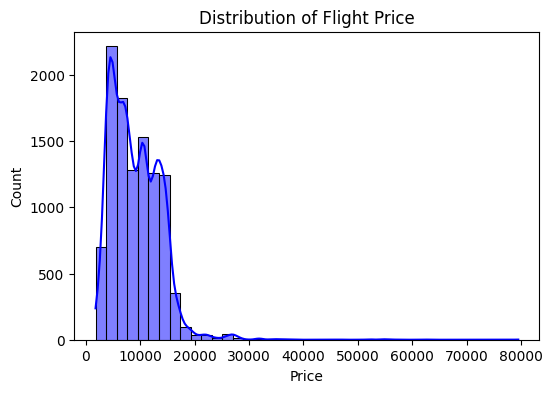

In [230]:
#Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, bins=40, color="blue")
plt.title("Distribution of Flight Price")
plt.show()

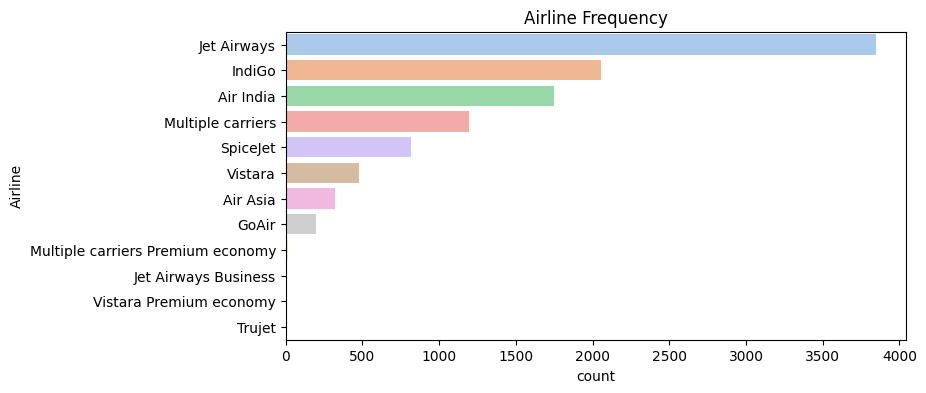

In [234]:
#Airline frequency
plt.figure(figsize=(8,4))
sns.countplot(y=df['Airline'], order=df['Airline'].value_counts().index, palette="pastel")
plt.title("Airline Frequency")
plt.show()

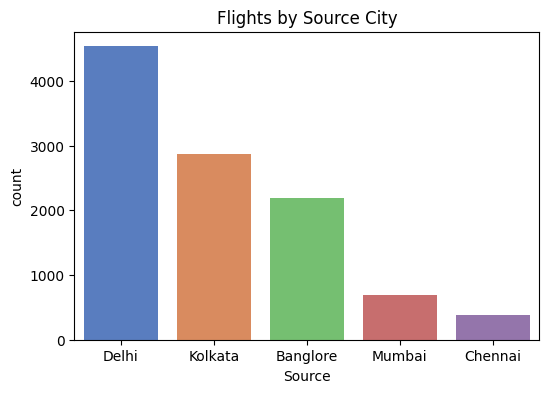

In [238]:
#Source city frequency
plt.figure(figsize=(6,4))
sns.countplot(x=df['Source'], order=df['Source'].value_counts().index, palette="muted")
plt.title("Flights by Source City")
plt.show()

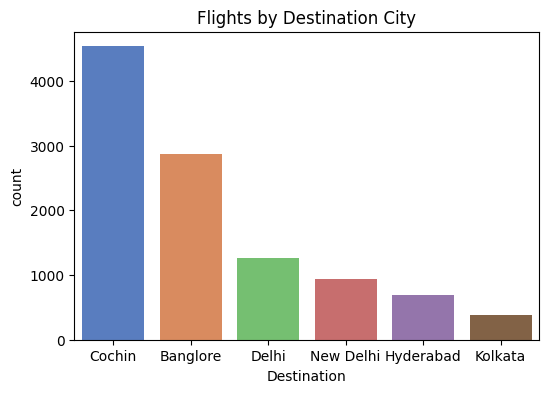

In [240]:
#Destination city frequency
plt.figure(figsize=(6,4))
sns.countplot(x=df['Destination'], order=df['Destination'].value_counts().index, palette="muted")
plt.title("Flights by Destination City")
plt.show()

In [248]:
df['duration_hours'] = pd.to_numeric(df['duration_hours'], errors='coerce')
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'], errors='coerce')

In [249]:
df['duration_hours'] = df['duration_hours'].fillna(0).astype(int)
df['duration_minutes'] = df['duration_minutes'].fillna(0).astype(int)

In [250]:
df['Total_Duration_Hours'] = df['duration_hours'] + (df['duration_minutes'] / 60)

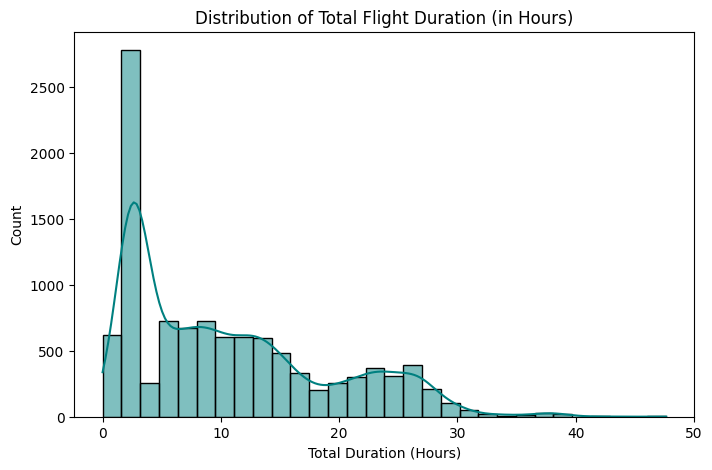

In [251]:
# Duration distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Duration_Hours'], kde=True, bins=30, color="teal")
plt.title("Distribution of Total Flight Duration (in Hours)")
plt.xlabel("Total Duration (Hours)")
plt.show()

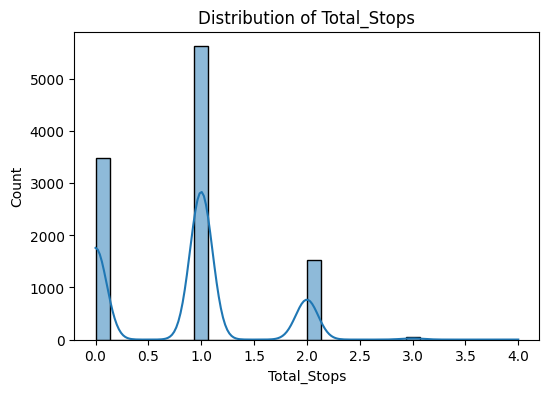

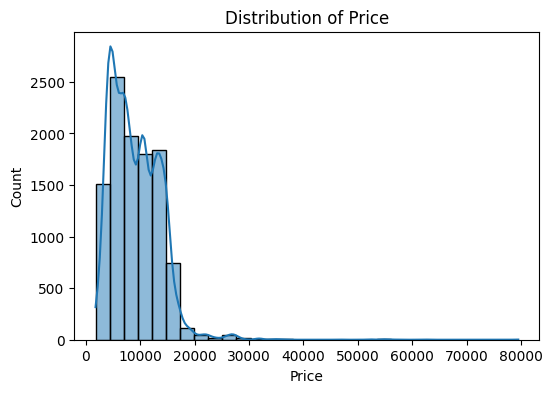

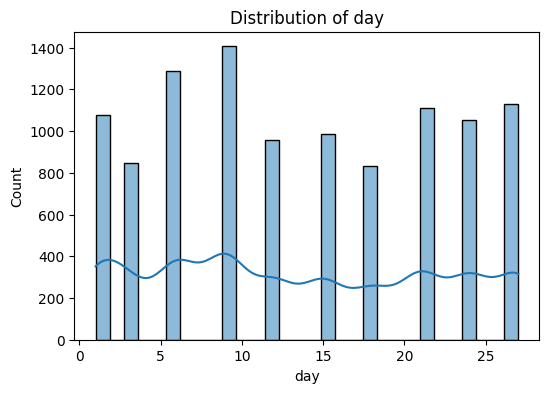

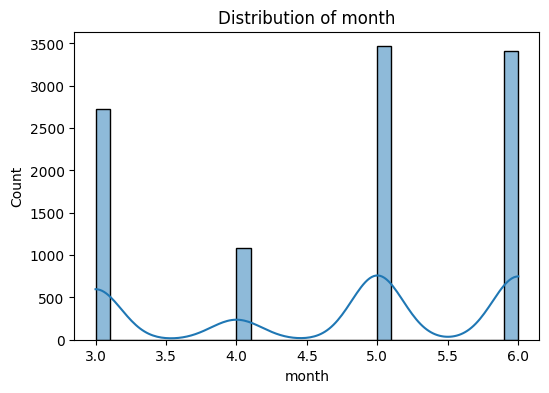

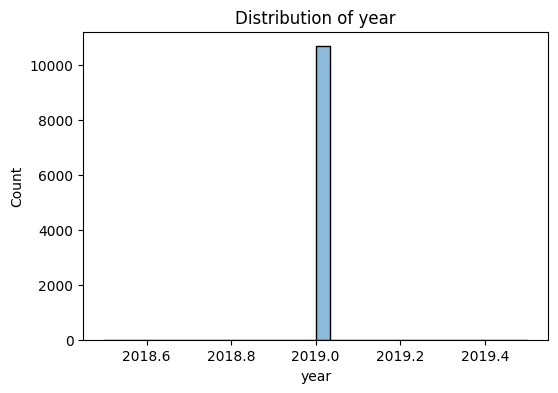

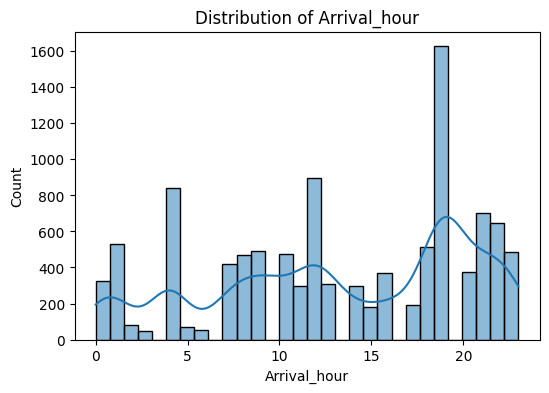

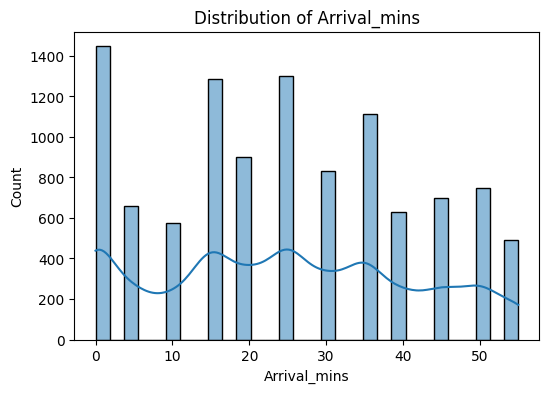

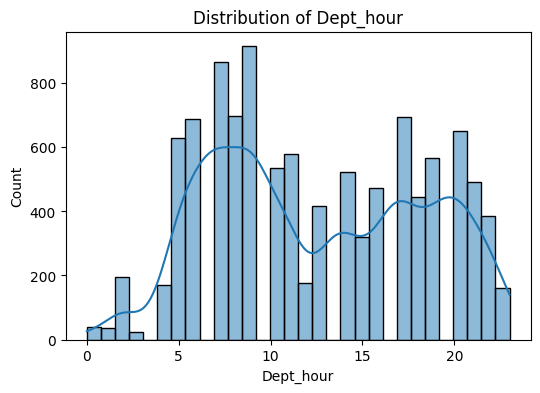

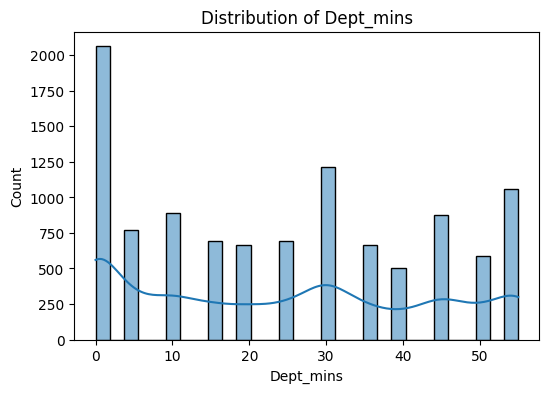

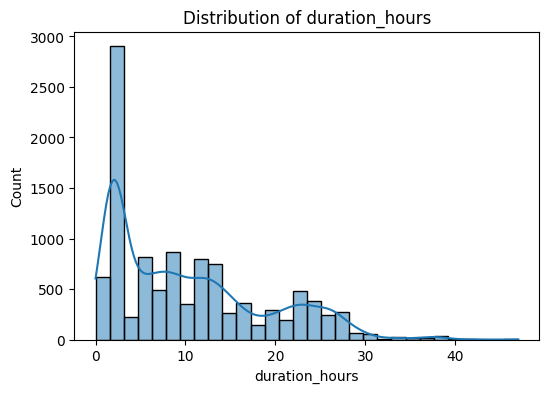

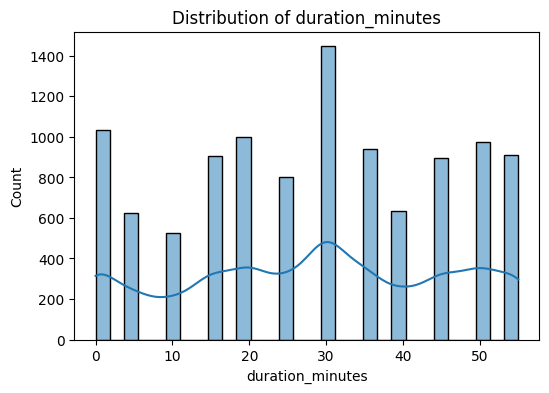

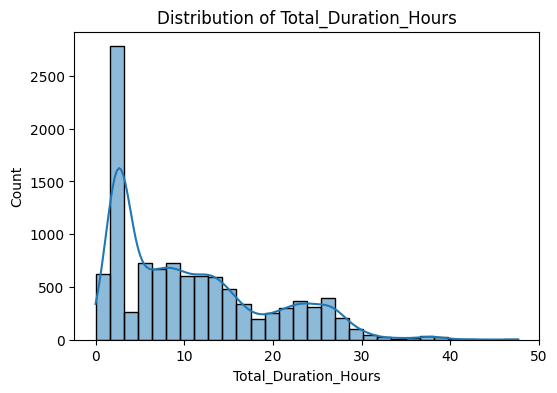

In [264]:
# Distribution of numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

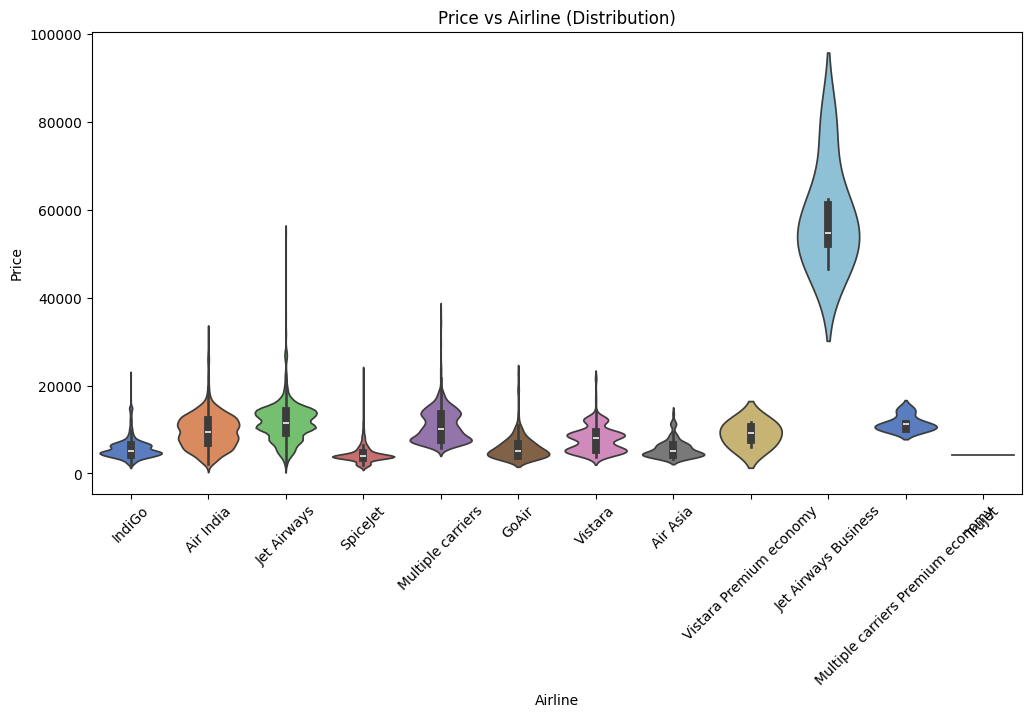

In [269]:
#Price vs Airline
plt.figure(figsize=(12,6))
sns.violinplot(x='Airline', y='Price', data=df, inner="box", palette="muted")
plt.xticks(rotation=45)
plt.title("Price vs Airline (Distribution)")
plt.show()

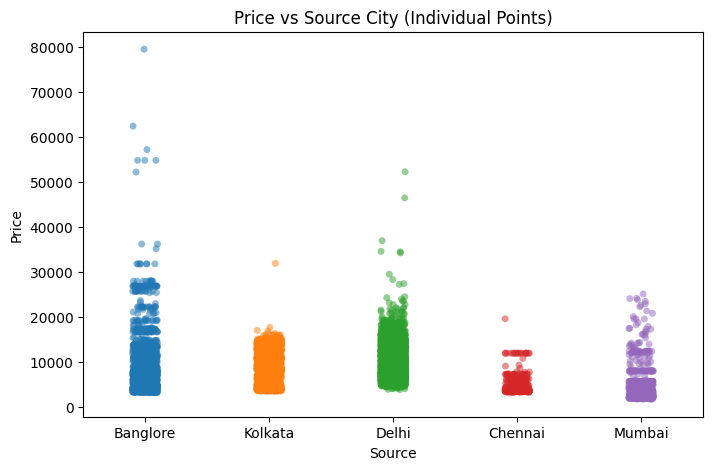

In [270]:
#Price vs Source
plt.figure(figsize=(8,5))
sns.stripplot(x='Source', y='Price', data=df, jitter=True, alpha=0.5, palette="tab10")
plt.title("Price vs Source City (Individual Points)")
plt.show()

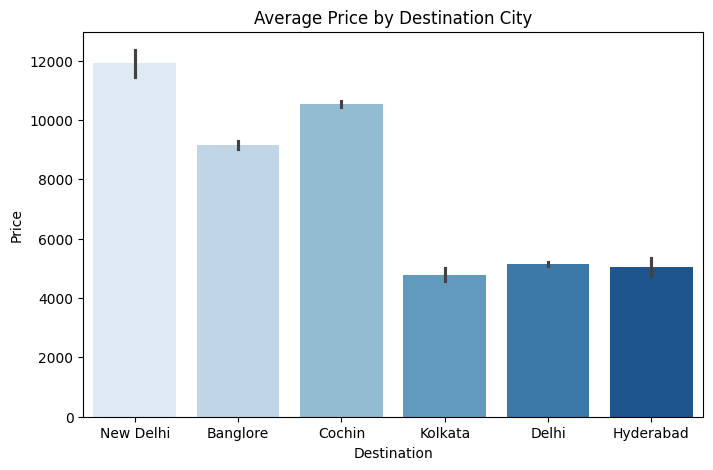

In [268]:
#Price vs Destination
plt.figure(figsize=(8,5))
sns.barplot(x='Destination', y='Price', data=df, estimator=np.mean, palette="Blues")
plt.title("Average Price by Destination City")
plt.show()

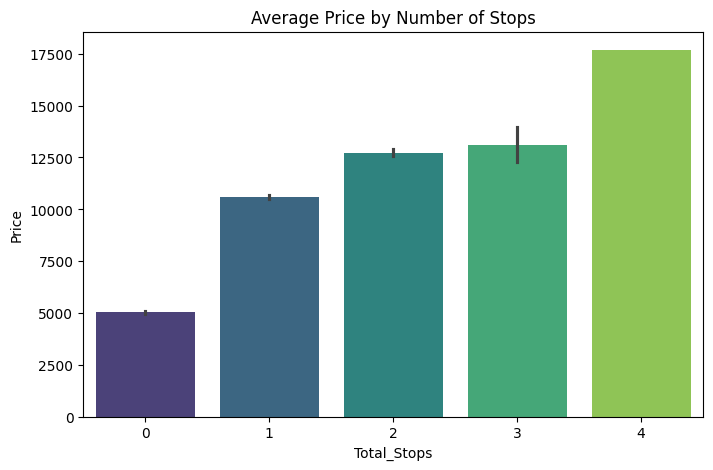

In [271]:
#Price vs Total Stops
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops', y='Price', data=df, estimator=np.mean, palette="viridis")
plt.title("Average Price by Number of Stops")
plt.show()

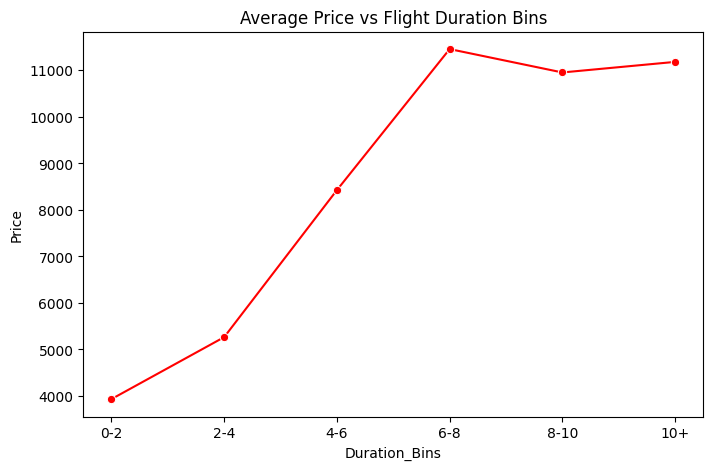

In [273]:
#Price vs Duration

avg_duration_price = df.groupby('Duration_Bins')['Price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Duration_Bins', y='Price', data=avg_duration_price, marker="o", color="red")
plt.title("Average Price vs Flight Duration Bins")
plt.show()


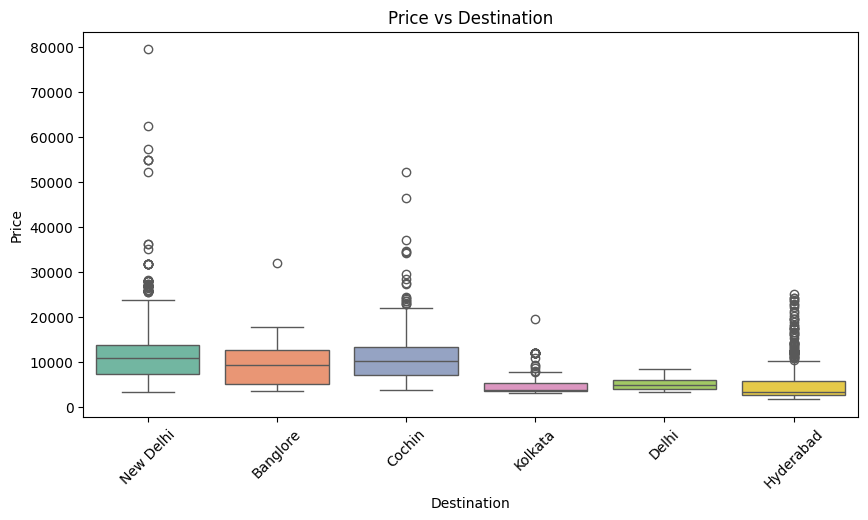

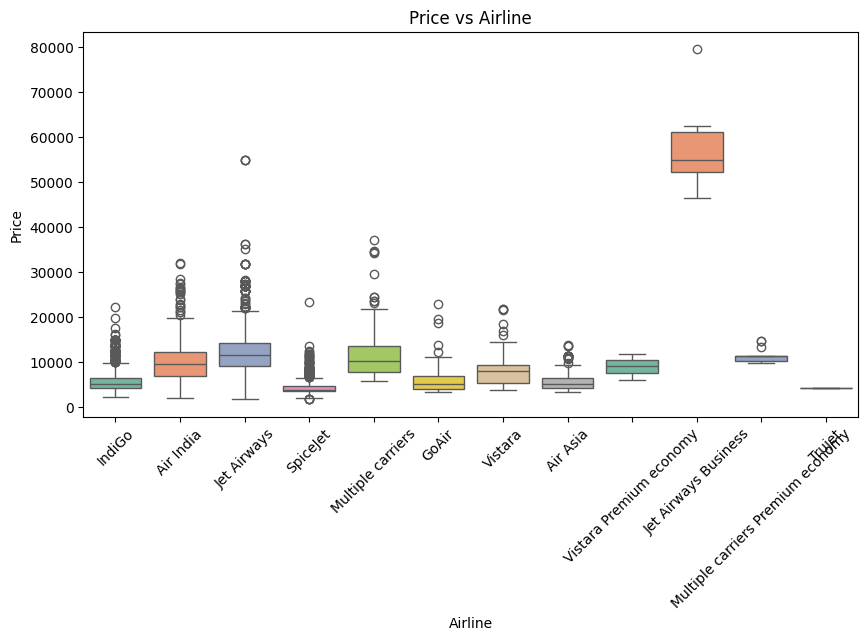

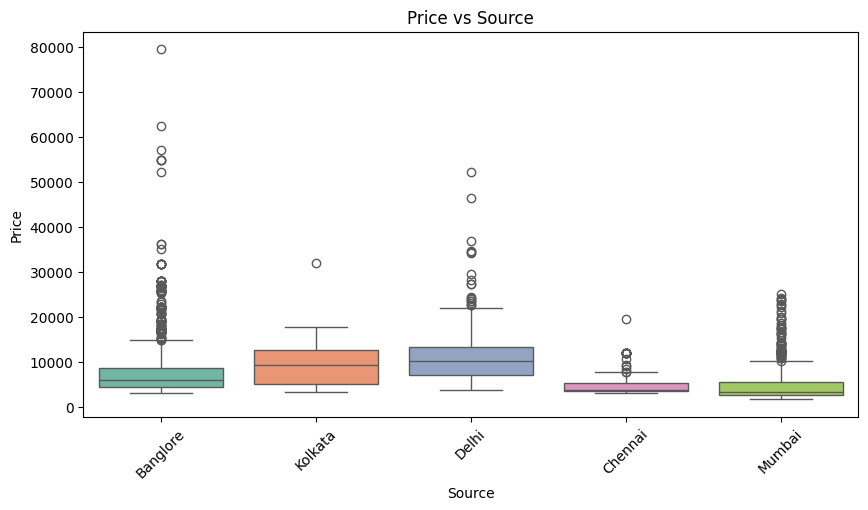

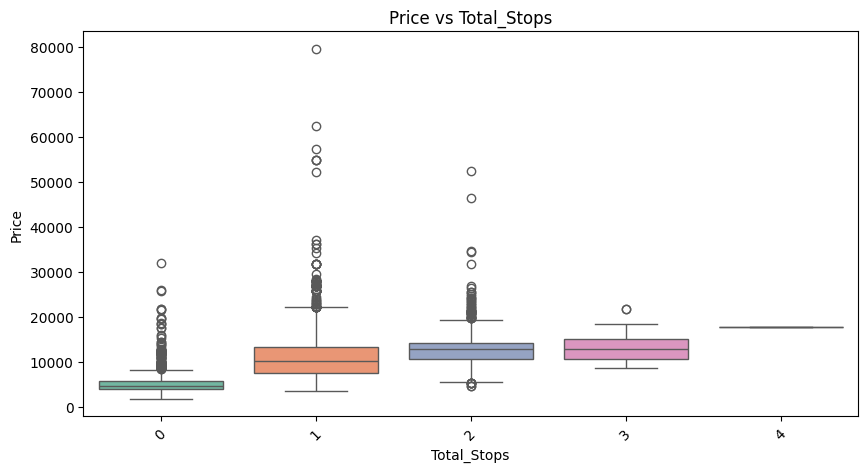

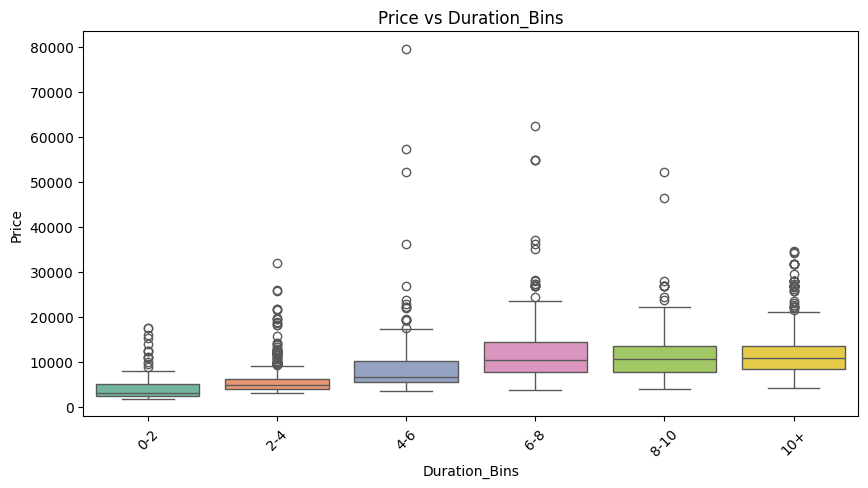

In [274]:
# List of categorical features to compare with Price
features = ['Destination', 'Airline', 'Source', 'Total_Stops', 'Duration_Bins']

for col in features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='Price', data=df, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Price vs {col}")
    plt.show()


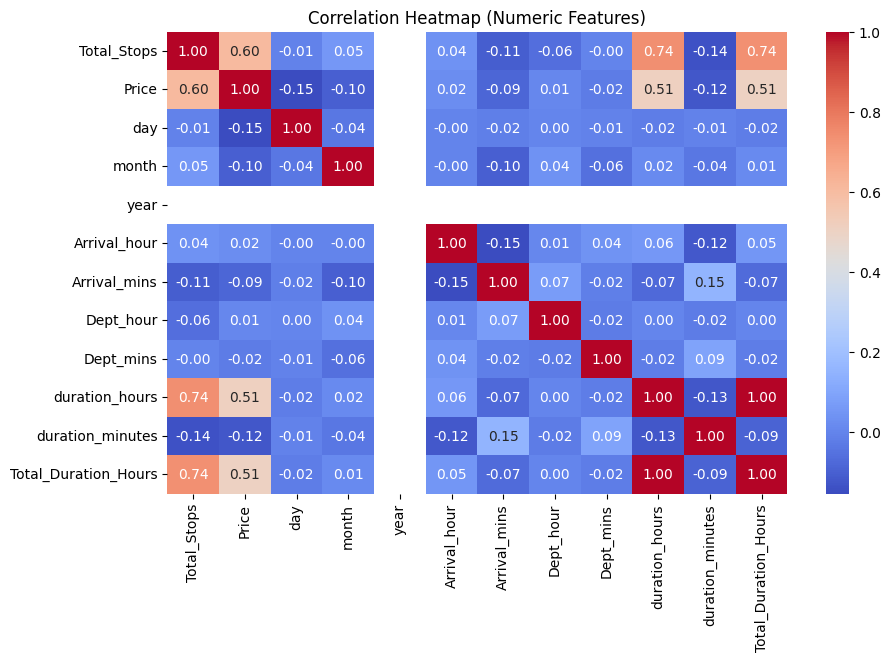

In [276]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

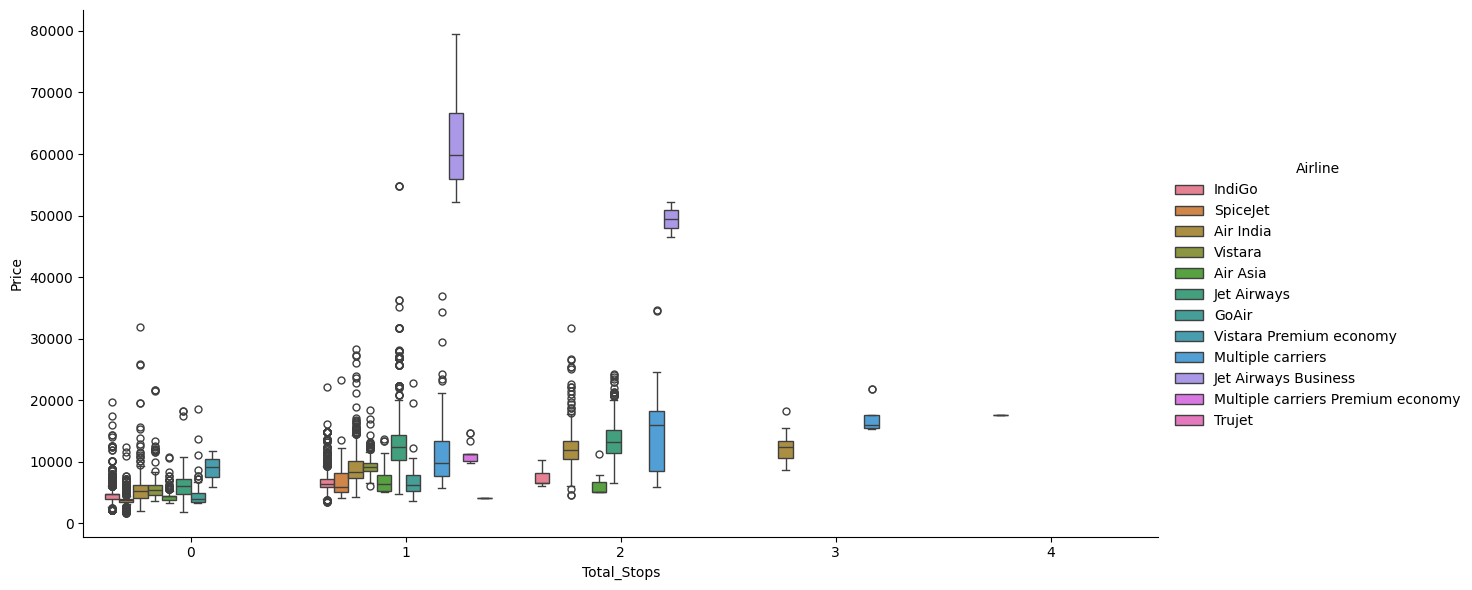

In [277]:
#Price vs Airline & Stops (FacetGrid)
g = sns.catplot(x='Total_Stops', y='Price', hue='Airline', data=df, kind='box', height=6, aspect=2)
g.set_titles("Price by Airline and Stops")
plt.show()

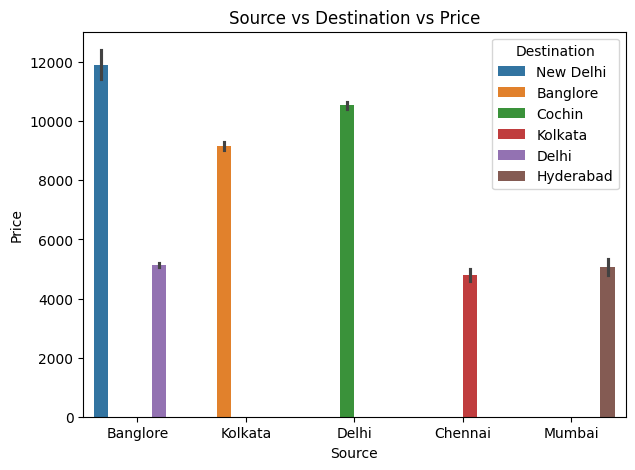

In [279]:
#Source vs Destination vs Price (Grouped barplot)
plt.figure(figsize=(7,5))
sns.barplot(x='Source', y='Price', hue='Destination', data=df)
plt.title("Source vs Destination vs Price")
plt.show()

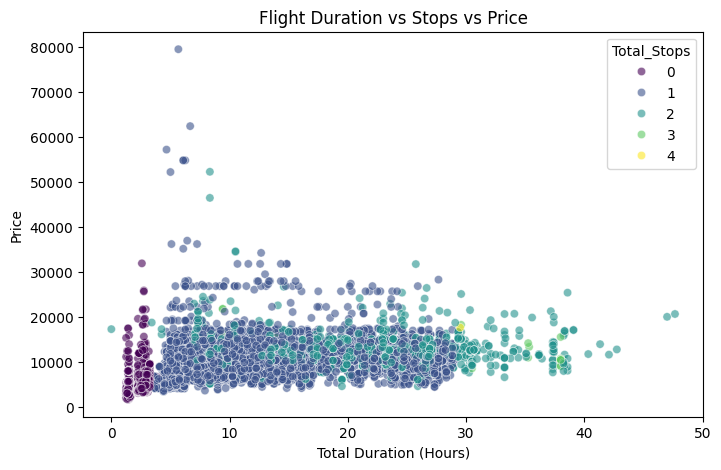

In [281]:
#Duration vs Stops vs Price (scatterplot with hue)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Duration_Hours', y='Price', hue='Total_Stops', data=df, alpha=0.6, palette="viridis")
plt.title("Flight Duration vs Stops vs Price")
plt.xlabel("Total Duration (Hours)")
plt.ylabel("Price")
plt.show()

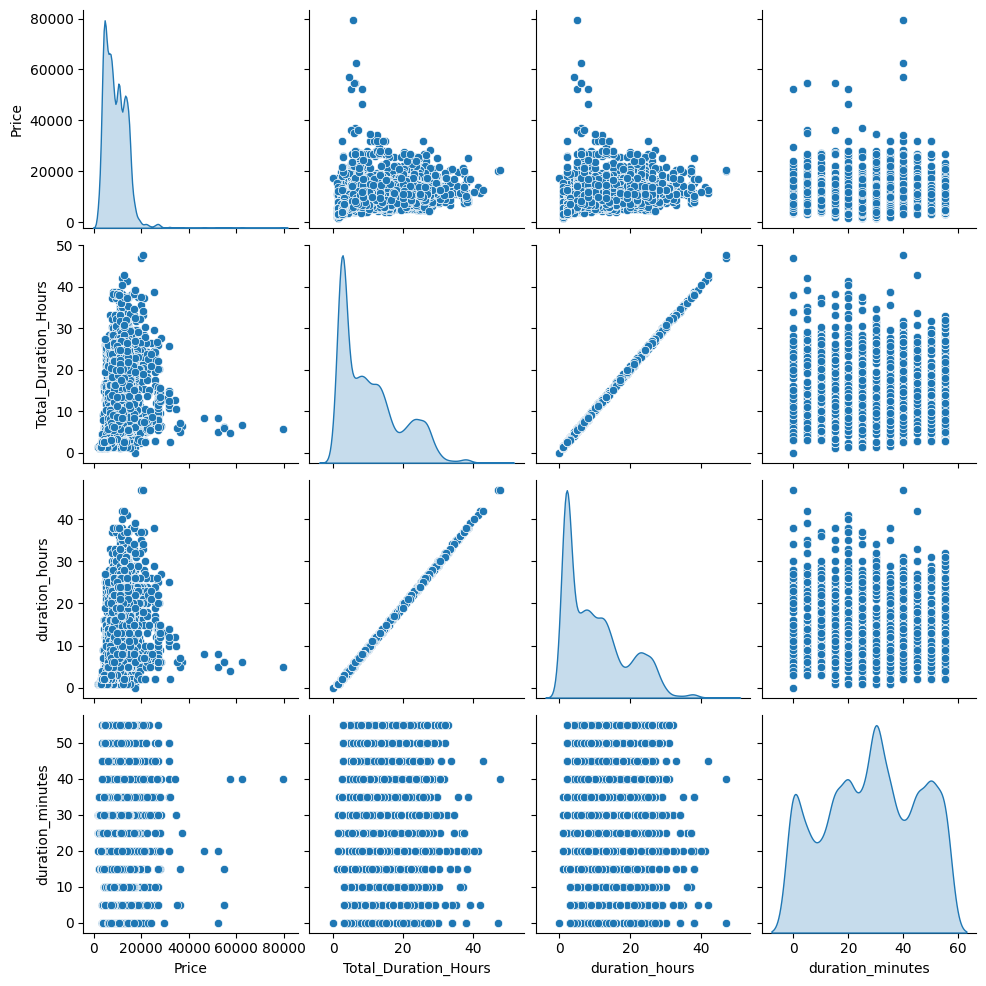

In [284]:
#Pairplot with selected features
sns.pairplot(df[['Price', 'Total_Duration_Hours', 'duration_hours', 'duration_minutes']], diag_kind='kde')
plt.show()

In [287]:
# Feature & Target Separation
X = df.drop('Price', axis=1)   # All features except Price
y = df['Price']                # Target variable

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (8545, 17) (8545,)
Test Shape: (2137, 17) (2137,)


In [290]:
#training features
print(X_train.head())

#target values
print(y_train.head())

# Check testing features
print(X_test.head())

# Check testing target
print(y_test.head())

                 Airline Source Destination                  Route  \
10005  Multiple carriers  Delhi      Cochin        DEL → BOM → COK   
3684         Jet Airways  Delhi      Cochin        DEL → BOM → COK   
1034            SpiceJet  Delhi      Cochin        DEL → MAA → COK   
3909   Multiple carriers  Delhi      Cochin        DEL → BOM → COK   
3088           Air India  Delhi      Cochin  DEL → HYD → BOM → COK   

       Total_Stops              Additional_Info       day     month  year  \
10005     0.258298                      No info  1.579784  0.255066   0.0   
3684      0.258298  In-flight meal not included -0.543018  0.255066   0.0   
1034      0.258298                      No info  1.225984 -0.604034   0.0   
3909      0.258298                      No info  0.872183 -1.463134   0.0   
3088      1.739614                      No info  1.225984  1.114165   0.0   

       Arrival_hour  Arrival_mins  Dept_hour  Dept_mins  duration_hours  \
10005      0.826796     -0.588051  -0.774

In [288]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_features = X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

print("Scaling completed.")

Scaling completed.


In [294]:
# Before scaling (original values)
print("Before scaling (first 5 rows):")
print(df[num_features].head())

# After scaling
print("\nAfter scaling (first 5 rows):")
print(X_train[num_features].head())

Before scaling (first 5 rows):
   Total_Stops  day  month  year  Arrival_hour  Arrival_mins  Dept_hour  \
0            0   24      3  2019             1            10         22   
1            2    1      5  2019            13            15          5   
2            2    9      6  2019             4            25          9   
3            1   12      5  2019            23            30         18   
4            1    1      3  2019            21            35         16   

   Dept_mins  duration_hours  duration_minutes  Total_Duration_Hours  
0         20               2                50              2.833333  
1         50               7                25              7.416667  
2         25              19                 0             19.000000  
3          5               5                25              5.416667  
4         50               4                45              4.750000  

After scaling (first 5 rows):
       Total_Stops       day     month  year  Arrival_hour  A